# Simulation
We simulate the gradient flow in this code

Let us plot the stationary distribution for (n-1)-parents

Iteration 981/1000: 100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 232.72it/s]


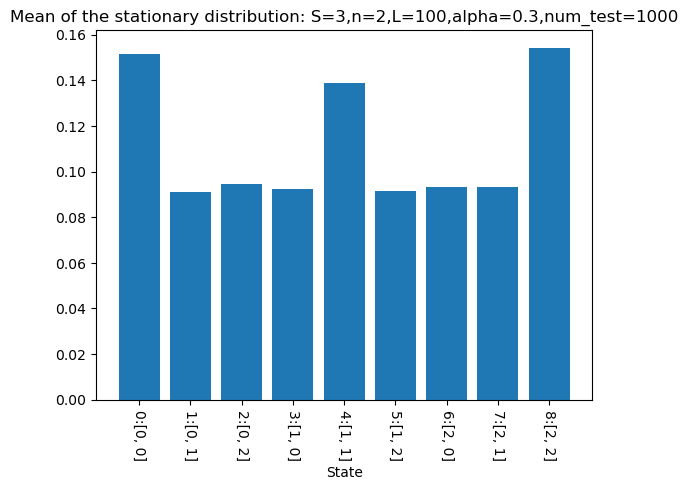

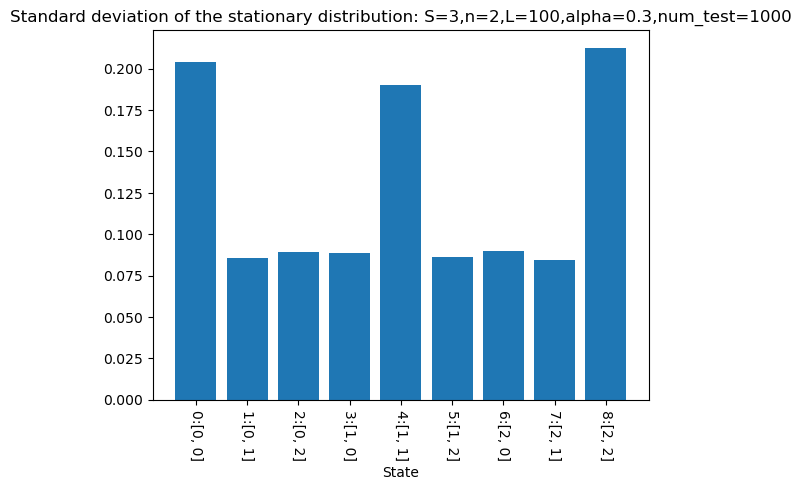

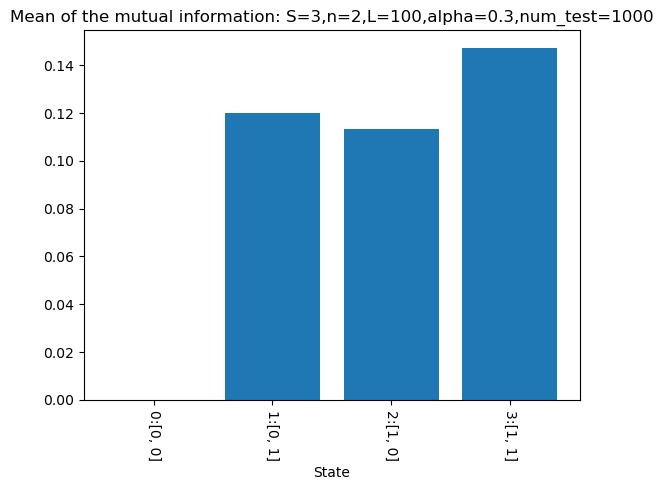

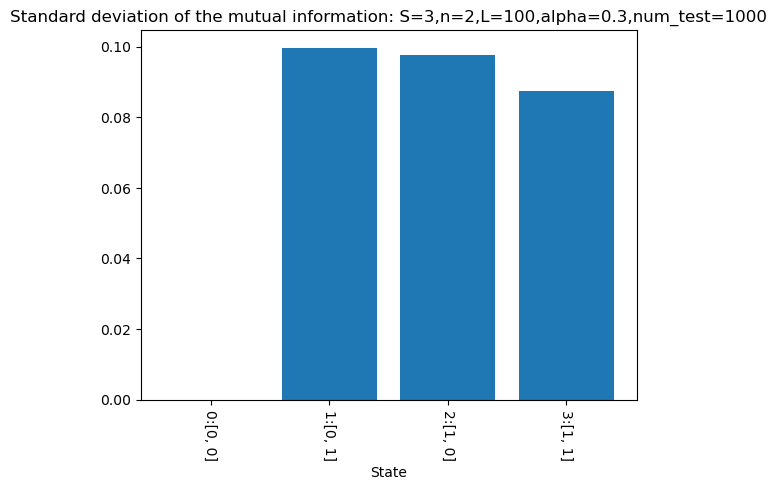

In [8]:
from tqdm import tqdm, trange
from dataset import NGramDataset
from tools import *
# Initialize the dataset
S, L, n_language, alpha, n_sample = 3, 100, 3, 0.3, 1
n = n_language - 1
num_test = 1000
power = 2

pbar = tqdm(range(num_test),ncols=100,mininterval=1)
mu = torch.zeros(num_test, S**n)
MI = torch.zeros(num_test, 2**n)
for j in pbar:
    dataset = NGramDataset(S, L, n_language, alpha, n_sample)
    pi = dataset.pi
    if j % 20 == 0:
        pbar.set_description(f'Iteration {j+1}/{num_test}')
        x, _ = get_stationary(pi, S, n, output=False)
    else: 
        x, _ = get_stationary(pi, S, n)

    mu[j] = x.reshape(-1)

    # test get_stationary_multi_parent
    mu_prod_pi = (x.reshape(-1, 1) * pi).transpose(0, 1).view(
        tuple([S for _ in range(n+1)])
        )
    for i, support in enumerate(range(0, 2**n)):
        MI[j, i] = chi_square_mutual_info_support(support, mu_prod_pi, S, n, power)
        # print(f'Power {power} chi-square MI for support {ind2code(support, 2, n)}: {chi}')

    # compute the mutual information
    for ind in range(2**n):
        support = ind2code(ind, 2, n)
        

mean = mu.mean(axis=0)
std = mu.std(axis=0)

# Let's plot the mean and standard deviation of the stationary distribution
plot_hist(mean.numpy(), S, n, title=f'Mean of the stationary distribution: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')
plot_hist(std.numpy(), S, n, title=f'Standard deviation of the stationary distribution: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')

# Let's plot the mutual information
mean_MI = MI.mean(axis=0)
std_MI = MI.std(axis=0)

plot_hist(mean_MI.numpy(), 2, n, title=f'Mean of the mutual information: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')
plot_hist(std_MI.numpy(), 2, n, title=f'Standard deviation of the mutual information: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')



Iteration 981/1000: 100%|███████████████████████████████████████| 1000/1000 [00:11<00:00, 84.55it/s]


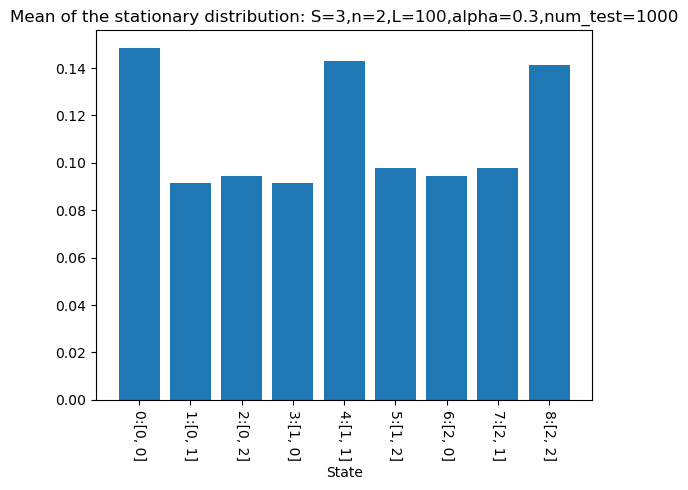

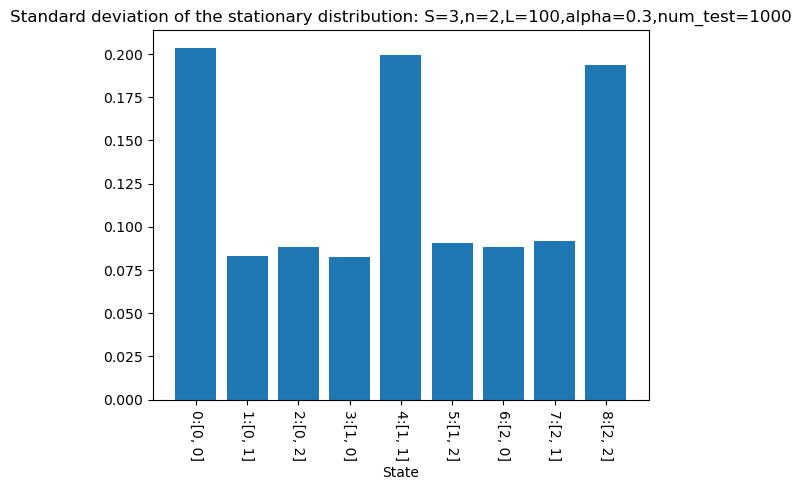

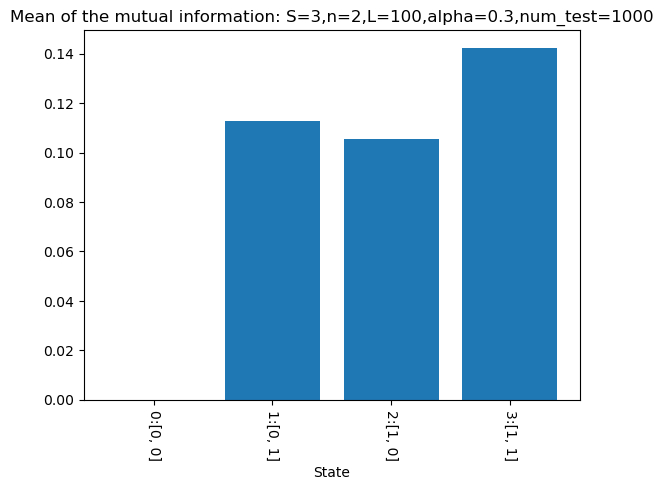

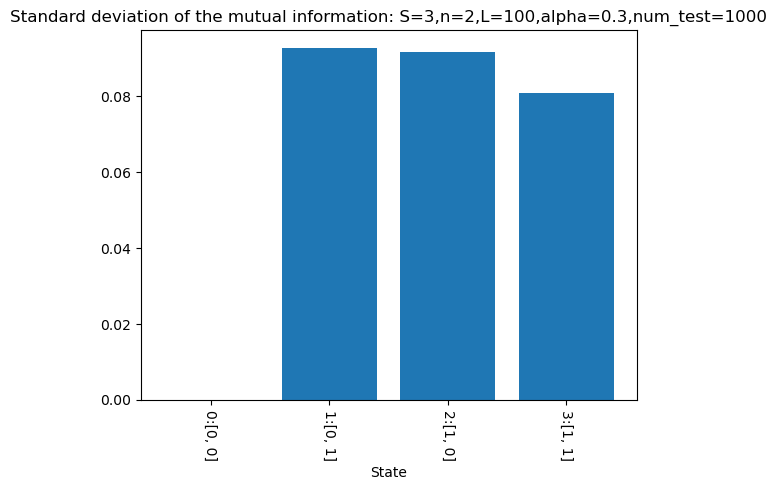

In [62]:
from tqdm import tqdm, trange
# Initialize the dataset
S, L, n_language, alpha, n_sample = 3, 100, 3, 0.3, 1
n = n_language - 1
num_test = 1000
power = 2

pbar = tqdm(range(num_test),ncols=100,mininterval=1)
mu = torch.zeros(num_test, S**n)
MI = torch.zeros(num_test, 2**n)
for j in pbar:
    dataset = NGramDataset(S, L, n_language, alpha, n_sample)
    pi = dataset.pi
    if j % 20 == 0:
        pbar.set_description(f'Iteration {j+1}/{num_test}')
        x, _ = get_stationary(pi, S, n, output=False)
    else: 
        x, _ = get_stationary(pi, S, n)

    mu[j] = x.reshape(-1)

    # test get_stationary_multi_parent
    mu_prod_pi = (x.reshape(-1, 1) * pi).transpose(0, 1).view(
        tuple([S for _ in range(n+1)])
        )
    for i, support in enumerate(range(0, 2**n)):
        MI[j, i] = chi_square_mutual_info_support(support, mu_prod_pi, power)
        # print(f'Power {power} chi-square MI for support {ind2code(support, 2, n)}: {chi}')

    # compute the mutual information
    for ind in range(2**n):
        support = ind2code(ind, 2, n)
        

mean = mu.mean(axis=0)
std = mu.std(axis=0)

# Let's plot the mean and standard deviation of the stationary distribution
plot_hist(mean.numpy(), S, n, title=f'Mean of the stationary distribution: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')
plot_hist(std.numpy(), S, n, title=f'Standard deviation of the stationary distribution: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')

# Let's plot the mutual information
mean_MI = MI.mean(axis=0)
std_MI = MI.std(axis=0)

plot_hist(mean_MI.numpy(), 2, n, title=f'Mean of the mutual information: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')
plot_hist(std_MI.numpy(), 2, n, title=f'Standard deviation of the mutual information: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')



Iteration 4981/5000: 100%|██████████████████████████████████████| 5000/5000 [02:19<00:00, 35.95it/s]


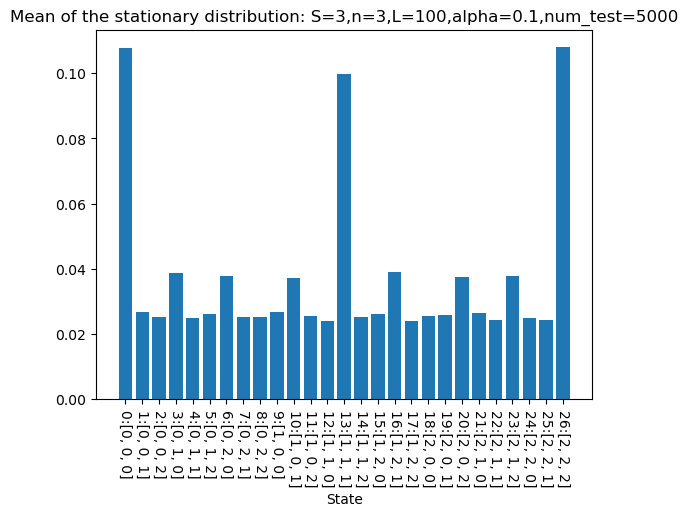

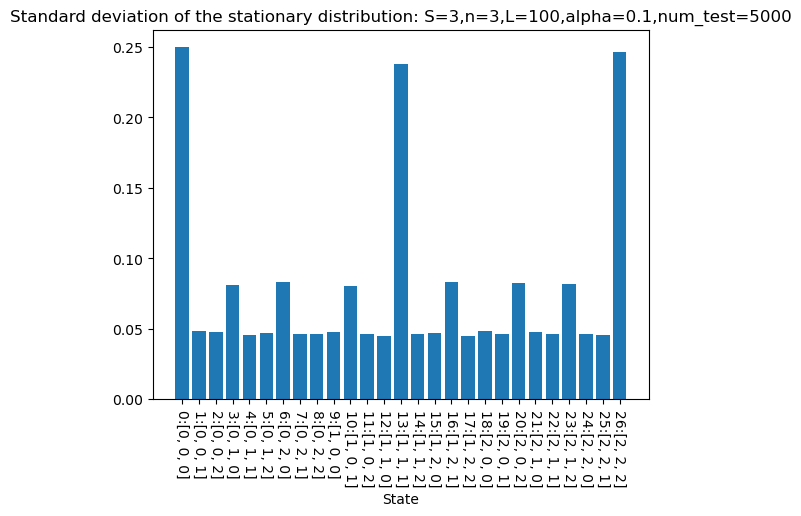

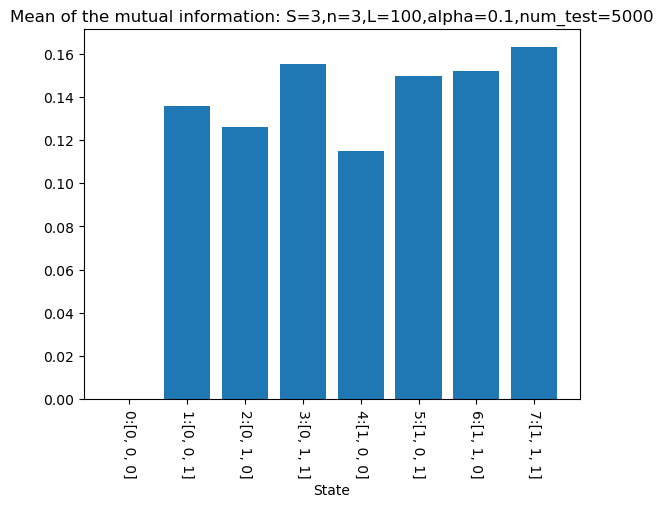

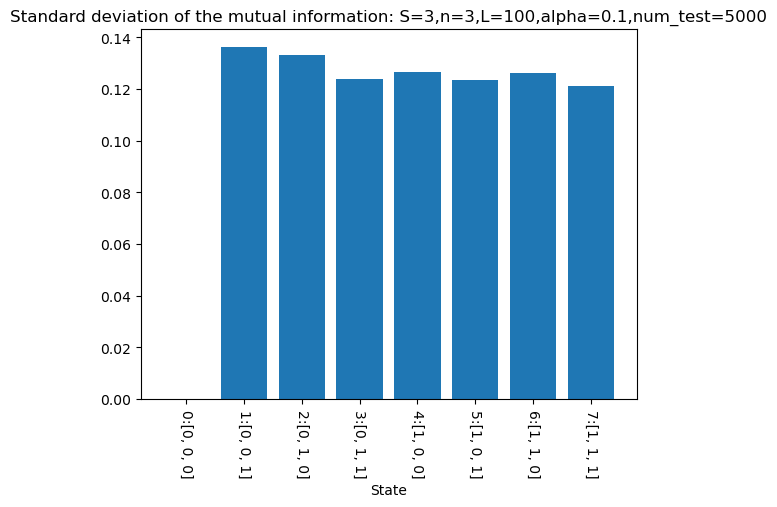

In [34]:
from tqdm import tqdm, trange
# Initialize the dataset
S, L, n_language, alpha, n_sample = 3, 100, 4, 0.1, 1
n = n_language - 1
num_test = 5000
power = 2

pbar = tqdm(range(num_test),ncols=100,mininterval=1)
mu = torch.zeros(num_test, S**n)
MI = torch.zeros(num_test, 2**n)
for j in pbar:
    dataset = NGramDataset(S, L, n_language, alpha, n_sample)
    pi = dataset.pi
    if j % 20 == 0:
        pbar.set_description(f'Iteration {j+1}/{num_test}')
        x, _ = get_stationary(pi, S, n, output=False, max_iter=1000)
    else: 
        x, _ = get_stationary(pi, S, n, max_iter=1000)

    mu[j] = x.reshape(-1)

    # test get_stationary_multi_parent
    mu_prod_pi = (x.reshape(-1, 1) * pi).transpose(0, 1).view(
        tuple([S for _ in range(n+1)])
        )
    for i, support in enumerate(range(0, 2**n)):
        MI[j, i] = chi_square_mutual_info_support(support, mu_prod_pi, power)
        # print(f'Power {power} chi-square MI for support {ind2code(support, 2, n)}: {chi}')

    # compute the mutual information
    for ind in range(2**n):
        support = ind2code(ind, 2, n)
        

mean = mu.mean(axis=0)
std = mu.std(axis=0)

# Let's plot the mean and standard deviation of the stationary distribution
plot_hist(mean.numpy(), S, n, title=f'Mean of the stationary distribution: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')
plot_hist(std.numpy(), S, n, title=f'Standard deviation of the stationary distribution: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')

# Let's plot the mutual information
mean_MI = MI.mean(axis=0)
std_MI = MI.std(axis=0)

plot_hist(mean_MI.numpy(), 2, n, title=f'Mean of the mutual information: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')
plot_hist(std_MI.numpy(), 2, n, title=f'Standard deviation of the mutual information: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')



Iteration 4981/5000: 100%|██████████████████████████████████████| 5000/5000 [02:18<00:00, 36.03it/s]


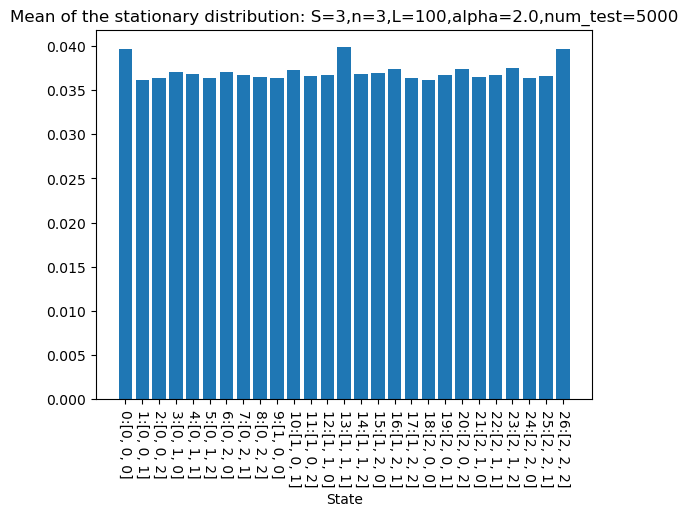

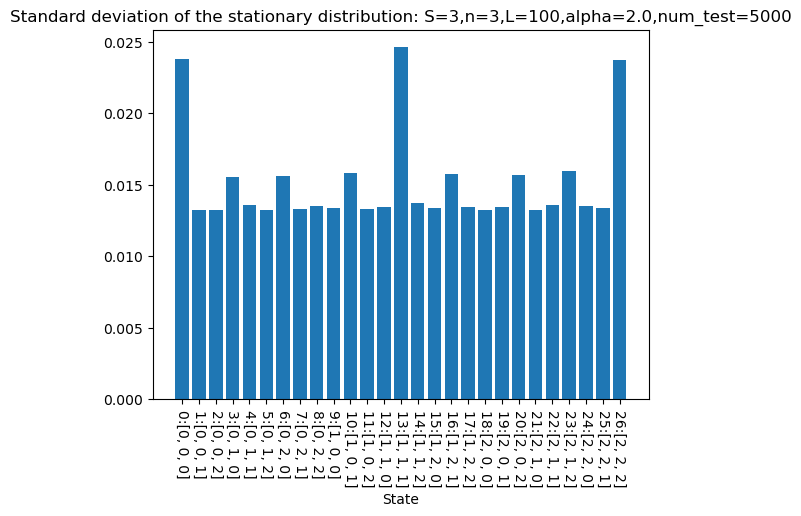

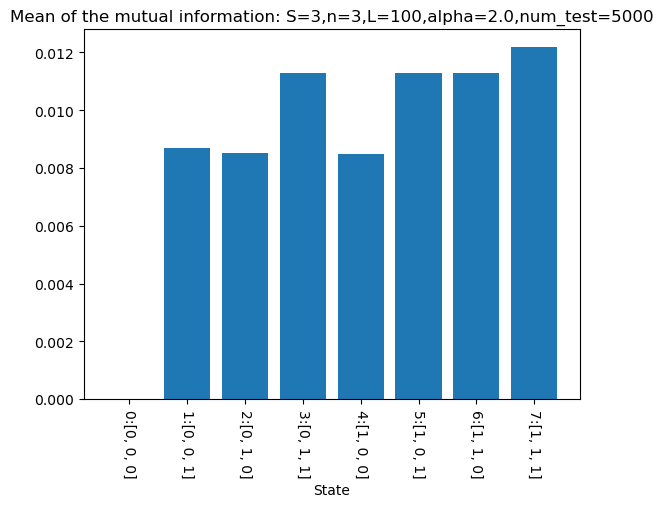

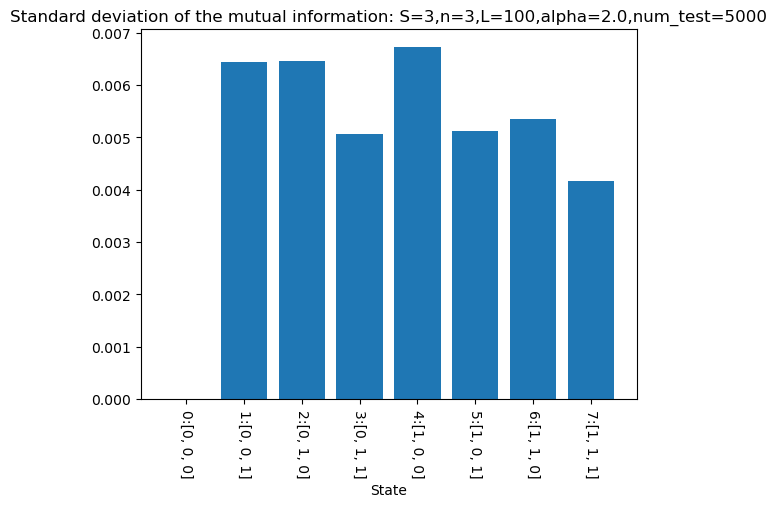

In [36]:
from tqdm import tqdm, trange
# Initialize the dataset
S, L, n_language, alpha, n_sample = 3, 100, 4, 2.0, 1
n = n_language - 1
num_test = 5000
power = 2

pbar = tqdm(range(num_test),ncols=100,mininterval=1)
mu = torch.zeros(num_test, S**n)
MI = torch.zeros(num_test, 2**n)
for j in pbar:
    dataset = NGramDataset(S, L, n_language, alpha, n_sample)
    pi = dataset.pi
    if j % 20 == 0:
        pbar.set_description(f'Iteration {j+1}/{num_test}')
        x, _ = get_stationary(pi, S, n, output=False, max_iter=1000)
    else: 
        x, _ = get_stationary(pi, S, n, max_iter=1000)

    mu[j] = x.reshape(-1)

    # test get_stationary_multi_parent
    mu_prod_pi = (x.reshape(-1, 1) * pi).transpose(0, 1).view(
        tuple([S for _ in range(n+1)])
        )
    for i, support in enumerate(range(0, 2**n)):
        MI[j, i] = chi_square_mutual_info_support(support, mu_prod_pi, power)
        # print(f'Power {power} chi-square MI for support {ind2code(support, 2, n)}: {chi}')

    # compute the mutual information
    for ind in range(2**n):
        support = ind2code(ind, 2, n)
        

mean = mu.mean(axis=0)
std = mu.std(axis=0)

# Let's plot the mean and standard deviation of the stationary distribution
plot_hist(mean.numpy(), S, n, title=f'Mean of the stationary distribution: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')
plot_hist(std.numpy(), S, n, title=f'Standard deviation of the stationary distribution: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')

# Let's plot the mutual information
mean_MI = MI.mean(axis=0)
std_MI = MI.std(axis=0)

plot_hist(mean_MI.numpy(), 2, n, title=f'Mean of the mutual information: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')
plot_hist(std_MI.numpy(), 2, n, title=f'Standard deviation of the mutual information: S={S},n={n},L={L},alpha={alpha},num_test={num_test}')



Let's study the stationary distribution

Final TV distance after 1000 iterations: 0.0
The kernel is:
tensor([[0.4992, 0.5008],
        [0.0081, 0.9919],
        [0.8004, 0.1996],
        [0.1080, 0.8920]])
[p_01 p_10 p_21 p_30]:
[0.500774621963501, 0.008114351890981197, 0.19959519803524017, 0.10803598910570145]
The stationary distribution for S=2, n=2:
tensor([[0.0042],
        [0.2588],
        [0.2588],
        [0.4782]])


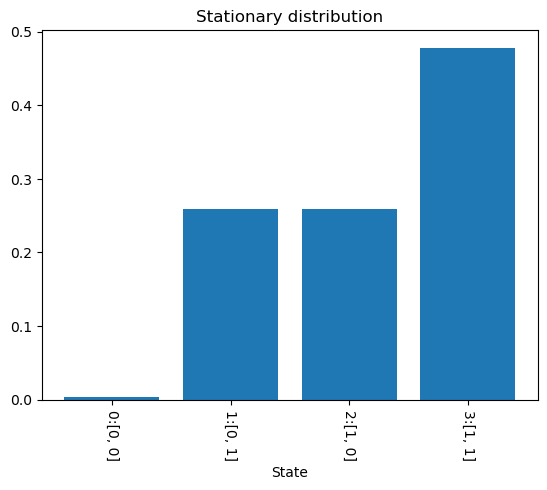

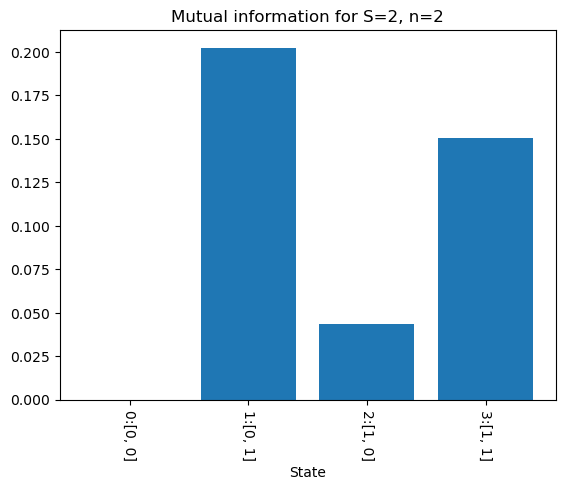

The mutual information for S=2, n=2:
tensor([-1.2517e-06,  2.0246e-01,  4.3569e-02,  1.5059e-01])


In [48]:
S, L, n_language, alpha, n_sample = 2, 100, 3, 0.5, 1
n = n_language - 1
num_test = 5000
power = 2

pi = NGramDataset(S, L, n_language, alpha, n_sample).pi
mu, _ = get_stationary(pi, S, n, output=True, max_iter=1000)
print(f'The kernel is:\n{pi}')
print(f'[p_01 p_10 p_21 p_30]:\n{[pi[0, 1].item(), pi[1, 0].item(), pi[2, 1].item(), pi[3, 0].item()]}')
print(f'The stationary distribution for S={S}, n={n}:\n{mu}')

# histogram the stationary distribution
plot_hist(mu, S, n)


# get the chi-square mutual information
mu_prod_pi = (mu.reshape(-1, 1) * pi).transpose(0, 1).view(
    tuple([S for _ in range(n+1)])
    )
MI = torch.zeros(2**n)
for i, support in enumerate(range(0, 2**n)):
    MI[i] = chi_square_mutual_info_support(support, mu_prod_pi, power)

# plot the mutual information
plot_hist(MI, 2, n, title=f'Mutual information for S={S}, n={n}')
print(f'The mutual information for S={S}, n={n}:\n{MI}')

In [5]:
# Let's see how close is the dataset's distribution to the stationary distribution
from dataset import NGramDataset
from tools import *
import torch
from tqdm import tqdm

S, L, n_language, alpha, n_sample = 2, 10000, 3, 0.5, 1
n = n_language - 1

def marginal_tv_convergence(S, L, n_language, alpha, num_test=50, output=False):
    n_sample = 1
    pbar = tqdm(range(num_test),ncols=100,mininterval=1)
    total_TV = 0

    for j in pbar:
        dataset = NGramDataset(S, L, n_language, alpha, n_sample)
        pi = dataset.pi
        mu, _ = get_stationary(pi, S, n, output=True, max_iter=1000)

        sample = dataset.samples
        # use a n-window to compute the empirical distribution
        count = torch.zeros(S**n)
        for i in range(1, L-n+1):
            count[code2ind(sample[0, i:i+n].flip(0), S)] += 1

        # normalize the count
        count /= count.sum()
        mu = mu.squeeze()

        # compute the total variation distance
        TV = torch.abs(count - mu).sum() / 2
        total_TV += TV

        # set discription 
        if output:
            pbar.set_description(f'Iteration {j+1}/{num_test}, TV={TV.item():.4f}')

    return total_TV/num_test



  0%|                                                                        | 0/50 [00:00<?, ?it/s]

Final TV distance after 1000 iterations: 7.37607479095459e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 5.960464477539063e-08
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 2.9802322387695312e-08
Final TV distance after 1000 iterations: 6.891787052154541e-08
Final TV distance after 1000 iterations: 1.043081283569336e-07
Final TV distance after 1000 iterations: 2.9802322387695312e-08
Final TV distance after 1000 iterations: 7.479684427380562e-09
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 2.4586915969848633e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 7.450580596923828e-08
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 10

100%|██████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 108.43it/s]


Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 1.4901161193847656e-07


  0%|                                                                        | 0/50 [00:00<?, ?it/s]

Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 5.960464477539063e-08
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.1372704654932022
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 1.1175870895385742e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 1.4901161193847656e-08
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 

100%|███████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 98.82it/s]


Final TV distance after 1000 iterations: 2.384258550591767e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0


  0%|                                                                        | 0/50 [00:00<?, ?it/s]

Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 1.7881575331557542e-07
Final TV distance after 1000 iterations: 2.9802322387695312e-08
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 5.62518835067749e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 6.7055248109682e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 6.705522537231445e-08
Final TV di

100%|███████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 81.22it/s]


Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 1.5133991837501526e-08


  0%|                                                                        | 0/50 [00:00<?, ?it/s]

Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 5.960464477539063e-08
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 5.966285243630409e-08
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 3.456929698586464e-05
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 3.7997961044311523e-07
Final TV distance after 100

 68%|██████████████████████████████████████████▊                    | 34/50 [00:01<00:00, 33.08it/s]

Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 1.7881393432617188e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 2.086162567138672e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 7.119386282283813e-06
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 3.7997961044311523e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0


100%|███████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.02it/s]


Final TV distance after 1000 iterations: 0.0


  0%|                                                                        | 0/50 [00:00<?, ?it/s]

Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 4.3585896492004395e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 5.960464477539063e-08
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.00027222372591495514
Final TV distance after 1000 iterations: 1.8033897504210472e-06
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0


 38%|███████████████████████▉                                       | 19/50 [00:01<00:01, 18.88it/s]

Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 7.897624527686276e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 5.960464477539063e-08
Final TV distance after 1000 iterations: 1.501757651567459e-08
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 1.0952353477478027e-06
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0


 76%|███████████████████████████████████████████████▉               | 38/50 [00:02<00:00, 18.81it/s]

Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 1.0186340659856796e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 2.4586915969848633e-07
Final TV distance after 1000 iterations: 0.0
Final TV distance after 1000 iterations: 0.0


100%|███████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 18.87it/s]

Final TV distance after 1000 iterations: 0.0


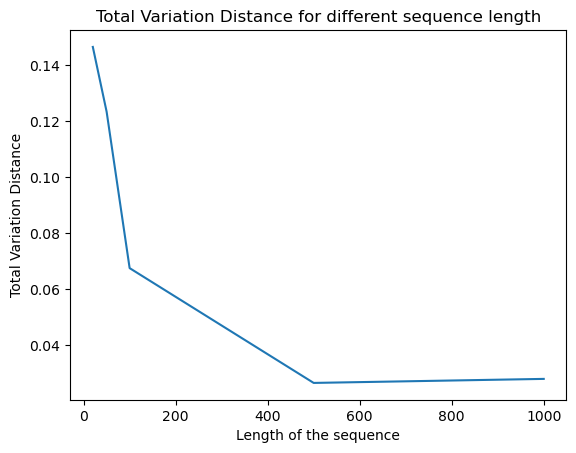

In [7]:
tv_ls = []
L_ls = [20, 50, 100, 500, 1000]
for L in L_ls:
    tv = marginal_tv_convergence(S, L, n_language, alpha, num_test=50, output=False)
    tv_ls.append(tv)

import matplotlib.pyplot as plt
plt.plot(L_ls, tv_ls)
plt.xlabel('Length of the sequence')
plt.ylabel('Total Variation Distance')
plt.title(f'Total Variation Distance for different sequence length')
plt.show()